# Lab5 - Training Deep Convolutional Neural Network
- Natcha Srisupan,59070501020
- Hathaipath Inlub, 59070501076

Name your file to (first 2 student ID digit)_(last 4 student ID digit)*4.ipynb

## Lab Instruction 

In this lab, you will learn to train a deep convolutional neural network using Keras library with Tensorflow backend. We will use  Cat vs Dog dataset.

See https://www.kaggle.com/c/dogs-vs-cats/data


### Your Turn! Dog or Cat Application 

Now, it time to put everything together and develop and Cat vs Dog classifier model. Assume that you and your company want to get more attraction on your product by launching a new product that can classify whether it is a dog or a cat. You have decide that you want a precision more than 90 - 95% in order to launch to product.

You have a cat and dog dataset contain total of 25000 images, 12500 for cat and other half for a dog.

After successfully develop this model, you can try to play with it to see how it perform. (You can upload your selfies image to see you are a dog or a cat)

Some note before start a project:
1. You have to load a data into a project using any method 
**suggest**
   

```
 !wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
 !unzip -qq Cat_Dog_data.zip
```


2. You have to plan on how you will split a data. (or no need for suggest method)
3. You have to preprocess your data before feed into a network. For example, cropping, padding, etc.
4. You can come up with any model or use pre-train model. It depend on you!

You have two week for this project so that you can compete with your competitor app! Now, create a new Jupyter notebook and start building a model!

# Data Preparation

In [1]:
!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2019-10-30 14:57:14--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.137.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.137.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  16.6MB/s    in 35s     

2019-10-30 14:57:50 (15.8 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [0]:
!unzip -qq Cat_Dog_data.zip

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
from keras.layers.convolutional import  MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# %load _utils
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras import backend as K

# define a function to plot the result from training step
def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['acc'][-1])
    print('Last validation accuracy: %s'%history.history['val_acc'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

# Define an evaluation function to print the evaluation result
def evaluation_report(model,features,labels):
    
    # Calculate result
    result = model.evaluate(features,labels,verbose=False)
    
    # Predict and convert into a class
    pred_class = model.predict(features).argmax(axis=1)
    labels = labels.argmax(axis=1)
    # Show report
    print(confusion_matrix(labels,pred_class))
    print(classification_report(labels,pred_class))
    print("Loss: %s Accuracy: %s" %(result[0],result[1]))
    
    return pred_class

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Cat_Dog_data/train',
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/Cat_Dog_data/test',
        batch_size=32,
        class_mode='categorical')

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [8]:
train_generator.image_shape

(256, 256, 3)

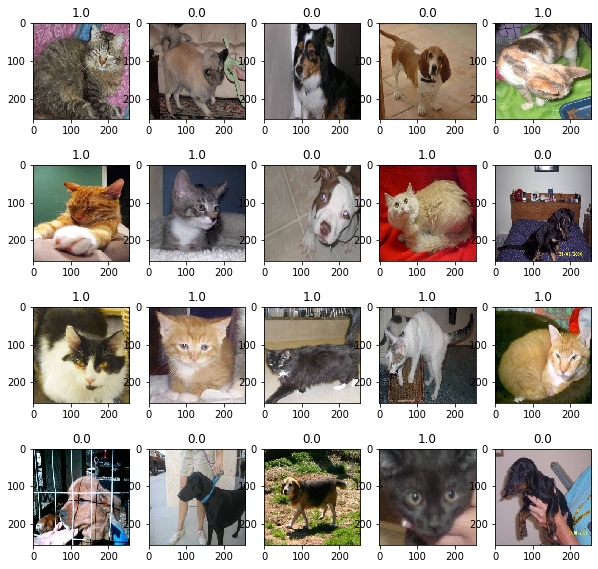

In [9]:
fig=plt.figure(figsize=(10,10))
img,label = test_generator.next()

for i in range(0,20):
    ax = fig.add_subplot(4, 5, i+1)
    ax.set_title(label[i][0])
    plt.imshow(img[i])
plt.show()

# 0 is dog , 1 is cat

# Build CNN

In [12]:
from keras.applications import xception

model = xception.Xception(include_top=False, 
                  weights='imagenet',
                  input_shape=(256,256,3))












83689472/83683744 [==============================] - 8s 0us/step


In [13]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [14]:
new_cnn2 = models.Sequential()
new_cnn2.add(model)
new_cnn2.add(layers.Flatten())
new_cnn2.add(layers.Dropout(0.25))
new_cnn2.add(layers.Dense(2,activation='softmax',name='output'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Load Model


In [15]:
# Build CNN first then run this section. No need to train model again
new_cnn2.load_weights('/content/drive/My Drive/KMUTT/4/Coding in Ai/Lab/Lab 5_CNN/new_cnn2_save.h5')
new_cnn2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['accuracy'])

# CNN Model Training

In [0]:
# new_cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['accuracy'])
new_cnn2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.00001), metrics=['accuracy'])

In [0]:
his = new_cnn2.fit(train_generator,epochs = 10,validation_data = test_generator)

Epoch 1/10
704/704 [==============================] - 1262s 2s/step - loss: 0.1178 - acc: 0.9559 - val_loss: 0.0276 - val_acc: 0.9908
Epoch 2/10
704/704 [==============================] - 1243s 2s/step - loss: 0.0537 - acc: 0.9800 - val_loss: 0.0236 - val_acc: 0.9908
Epoch 3/10
704/704 [==============================] - 1245s 2s/step - loss: 0.0429 - acc: 0.9837 - val_loss: 0.0208 - val_acc: 0.9916
Epoch 4/10
704/704 [==============================] - 1248s 2s/step - loss: 0.0382 - acc: 0.9860 - val_loss: 0.0180 - val_acc: 0.9928
Epoch 5/10
704/704 [==============================] - 1242s 2s/step - loss: 0.0312 - acc: 0.9887 - val_loss: 0.0191 - val_acc: 0.9928
Epoch 6/10
704/704 [==============================] - 1240s 2s/step - loss: 0.0259 - acc: 0.9905 - val_loss: 0.0155 - val_acc: 0.9924
Epoch 7/10
704/704 [==============================] - 1241s 2s/step - loss: 0.0242 - acc: 0.9913 - val_loss: 0.0130 - val_acc: 0.9944
Epoch 8/10
704/704 [==============================] - 1240s 2s

Last train accuracy: 0.9939111111111111
Last validation accuracy: 0.9948


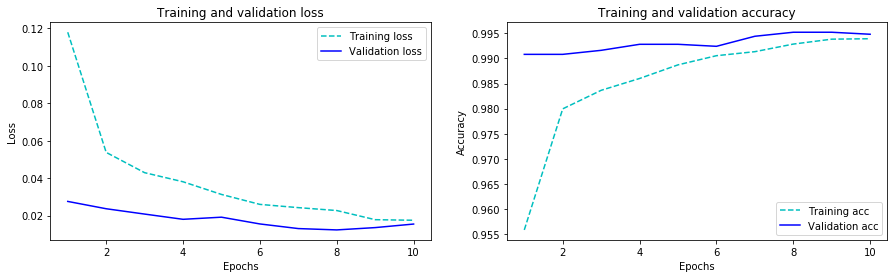

In [0]:
show_result(his)

In [0]:
new_cnn2.save_weights('/content/drive/My Drive/KMUTT/4/Coding in Ai/Lab/Lab 5_CNN/new_cnn2_save.h5')

# Model Evaluation

In [17]:
test_loss, test_acc = new_cnn2.evaluate(test_generator)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

79/79 [==============================] - 43s 539ms/step
Test Loss: 0.015466602504699403
Test Accuracy: 0.9948


In [19]:
test = test_datagen.flow_from_directory(
        '/content/Cat_Dog_data/test',
        batch_size=2500,
        class_mode='categorical')

Found 2500 images belonging to 2 classes.


In [0]:
img_test,label_test = test.next()

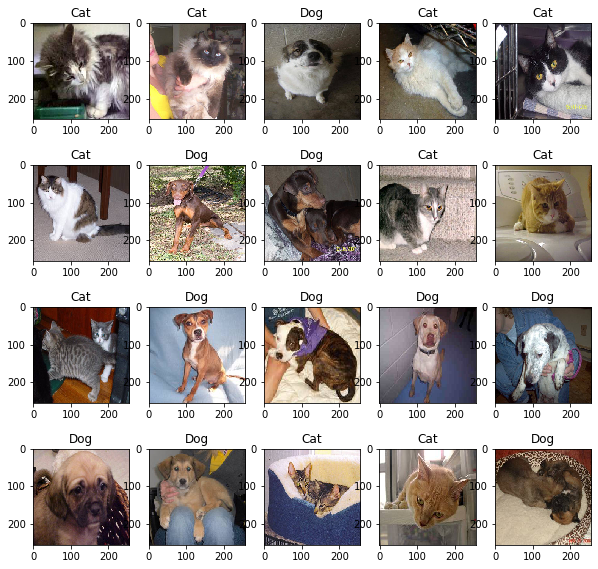

In [22]:
fig_test=plt.figure(figsize=(10,10))
for i in range(0,20):
    ax = fig_test.add_subplot(4, 5, i+1)
    ax.set_title('Cat' if label_test[i][0] == 1 else 'Dog')
    plt.imshow(img_test[i])
plt.show()

In [23]:
pred_class = evaluation_report(new_cnn2,img_test,label_test)

[[1240   10]
 [   3 1247]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1250
           1       0.99      1.00      0.99      1250

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

Loss: 0.01546660288453786 Accuracy: 0.9948


In [24]:
pred_class
#0 is cat, 1 is dog

array([0, 0, 1, ..., 0, 1, 0])

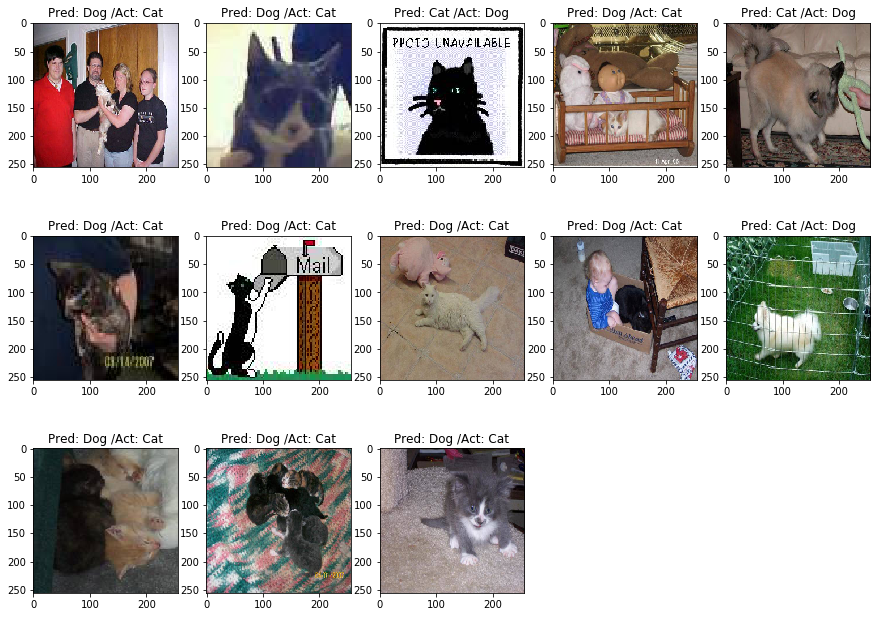

In [25]:
#Show false prediction
fig_test=plt.figure(figsize=(15,15))
j=1
for i in range(0,2500):
    if pred_class[i] != label_test[i][1]:
      ax = fig_test.add_subplot(4, 5, j)
      ax.set_title('%s %s' %('Pred: Cat' if pred_class[i] == 0 else 'Pred: Dog','/Act: Cat' if label_test[i][1] == 0 else '/Act: Dog'))
      # ax.set_title('%s %s' %'Cat' if pred_class[i] == 1 else 'Dog')
      plt.imshow(img_test[i])
      j += 1
plt.show()

# Prediction Results

In [0]:
from keras.preprocessing import image

#Input image and prediction function
def predict_pic(img_name):
  path = '/content/drive/My Drive/KMUTT/4/Coding in Ai/Lab/Lab 5_CNN/'+img_name+'.jpg'
  img = image.load_img(path,target_size=(256,256), grayscale=False)
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(image.img_to_array(img),axis=0)/255.
  activation = new_cnn2.predict(img_tensor)
  # print(activation)
  return img,activation

#plot image and predicted results, image list as input 
def plot_results(img_list):
  img = []
  activation = []
  for img_name in img_list:
    img_temp,actication_temp = predict_pic(img_name)
    img.append(img_temp)
    activation.append(actication_temp[0])
  fig_predict=plt.figure(figsize=(15,15))
  for i in range(0,len(img_list)):
      ax = fig_predict.add_subplot(4, 5, i+1)
      # print(activation[i][0])
      ax.set_title('Cat'+' %.4f' %(activation[i][0]) if activation[i][0] > 0.5 else 'Dog'+' %.4f' %(activation[i][1]))
      plt.imshow(img[i])
  plt.show()

In [0]:
pic_name = ['c1','c4','c5','d1','d2','d3','d4','d5','cd1','cd2','cd3','t1','p1','p2','b1']

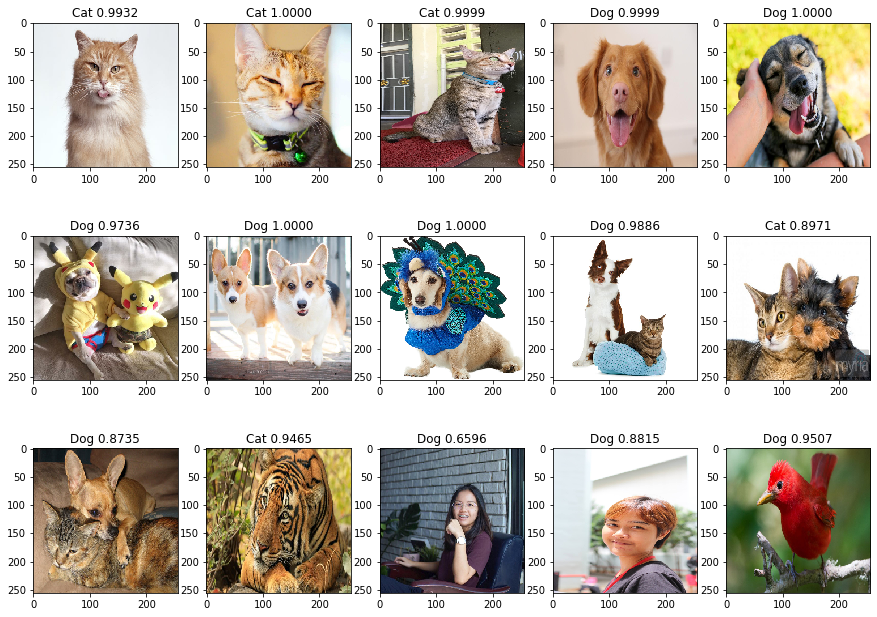

In [58]:
plot_results(pic_name)
#### The number is percentage of being like cat or dog